In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

In [48]:
dataset = pd.read_csv('wine.csv')
dataset.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [49]:
X = dataset.loc[:, ['Alcohol', 'Phenols']].values
y = dataset.loc[:, 'Wine'].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Analiza SVM dla jądra promieniowego

In [52]:
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

In [53]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [54]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
print(f'Train accuracy: {accuracy_score(y_train, y_pred_train)}')

[[40  0  0]
 [ 3 40  7]
 [ 1  7 26]]
Train accuracy: 0.8548387096774194


In [55]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
print(f'Test accuracy: {accuracy_score(y_test, y_pred_test)}')

[[19  0  0]
 [ 2 17  2]
 [ 2  1 11]]
Test accuracy: 0.8703703703703703


# Model nadmiernie dopasowany
- train i test acc. > 60% 
- test acc. (0.870) > train acc. (0.855)

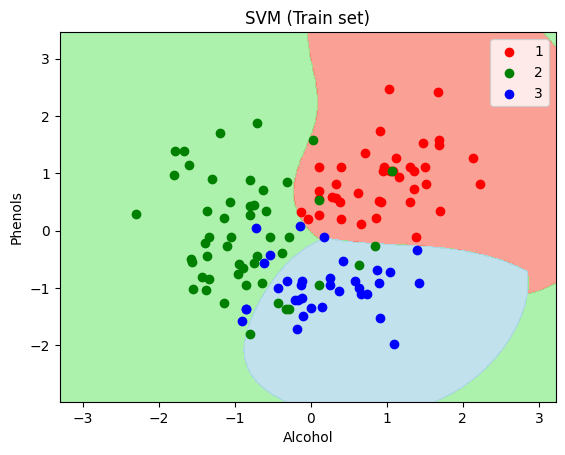

In [56]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue'])
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

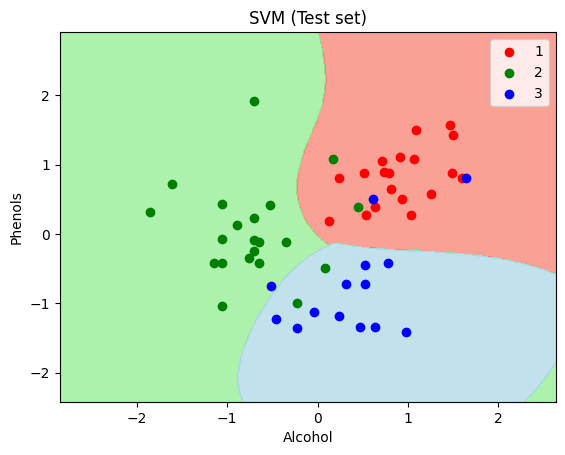

In [57]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue'])
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

# Analiza SVM dla jądra liniowego

In [58]:
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [59]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [60]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
print(f'Train accuracy: {accuracy_score(y_train, y_pred_train)}')

[[38  2  0]
 [ 4 40  6]
 [ 2  4 28]]
Train accuracy: 0.8548387096774194


In [61]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
print(f'Test accuracy: {accuracy_score(y_test, y_pred_test)}')

[[19  0  0]
 [ 2 17  2]
 [ 2  1 11]]
Test accuracy: 0.8703703703703703


# Model nadmiernie dopasowany
- train i test acc. > 60% 
- test acc. (0.870) > train acc. (0.855)

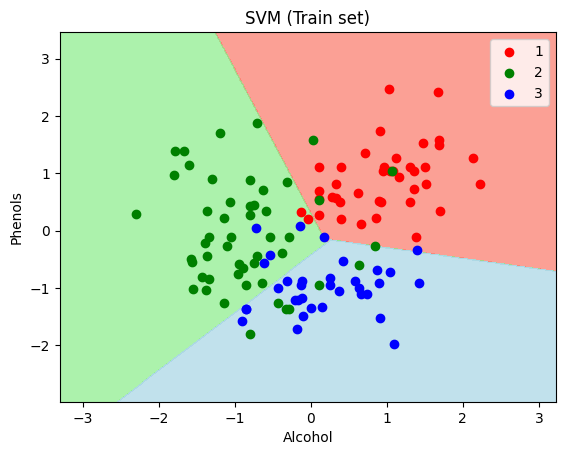

In [62]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue'])
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

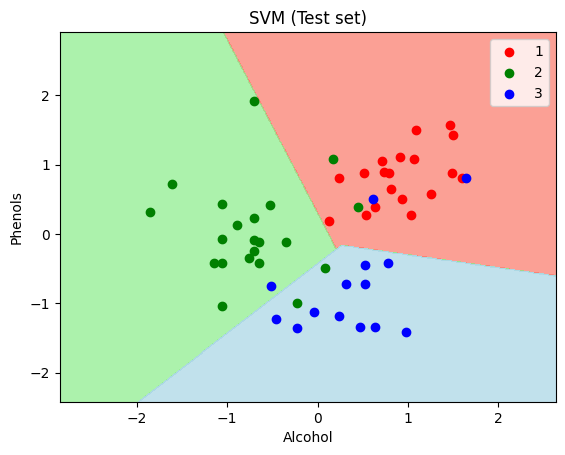

In [63]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue'])
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

# Analiza SVM dla jądra wielomianowego

In [64]:
classifier = SVC(kernel='poly', random_state=42)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [65]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [66]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
print(f'Train accuracy: {accuracy_score(y_train, y_pred_train)}')

[[26 14  0]
 [ 1 43  6]
 [ 0 12 22]]
Train accuracy: 0.7338709677419355


In [67]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
print(f'Test accuracy: {accuracy_score(y_test, y_pred_test)}')

[[15  4  0]
 [ 0 21  0]
 [ 1  5  8]]
Test accuracy: 0.8148148148148148


# Model nadmiernie dopasowany
- train i test acc. > 60% 
- test acc. (0.815) > train acc. (0.734)

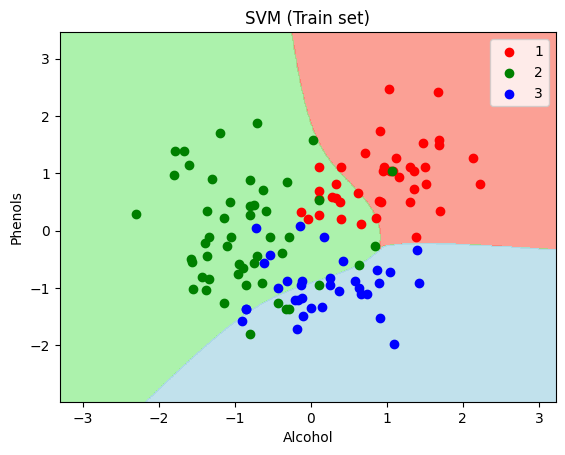

In [68]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue'])
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

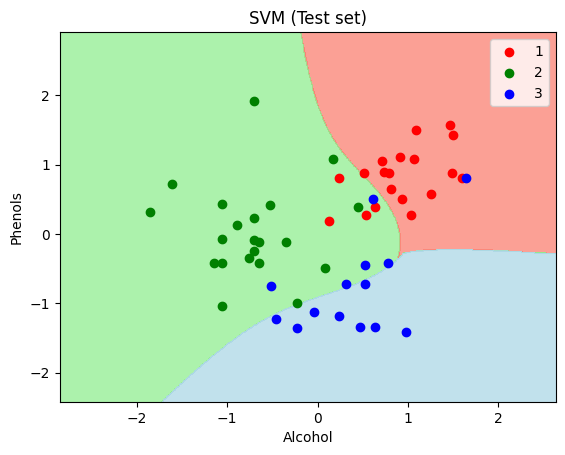

In [69]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue'])
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

# Analiza SVM dla jądra sigmoidalnego

In [70]:
classifier = SVC(kernel='sigmoid', random_state=42)
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=42)

In [71]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [72]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
print(f'Train accuracy: {accuracy_score(y_train, y_pred_train)}')

[[34  6  0]
 [ 3 40  7]
 [ 0  6 28]]
Train accuracy: 0.8225806451612904


In [73]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
print(f'Test accuracy: {accuracy_score(y_test, y_pred_test)}')

[[18  1  0]
 [ 3 16  2]
 [ 2  1 11]]
Test accuracy: 0.8333333333333334


# Model nadmiernie dopasowany
- train i test acc. > 60% 
- test acc. (0.833) > train acc. (0.826)

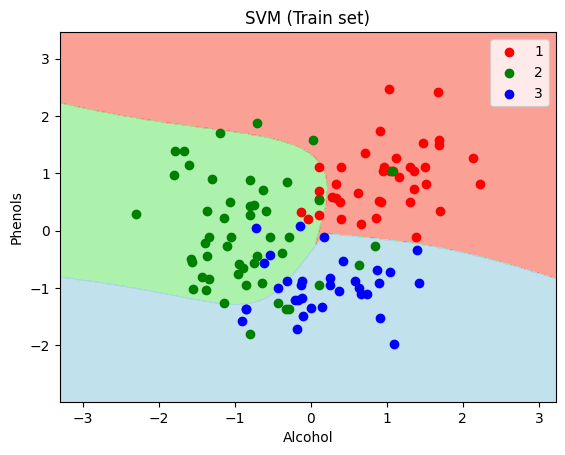

In [74]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue'])
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

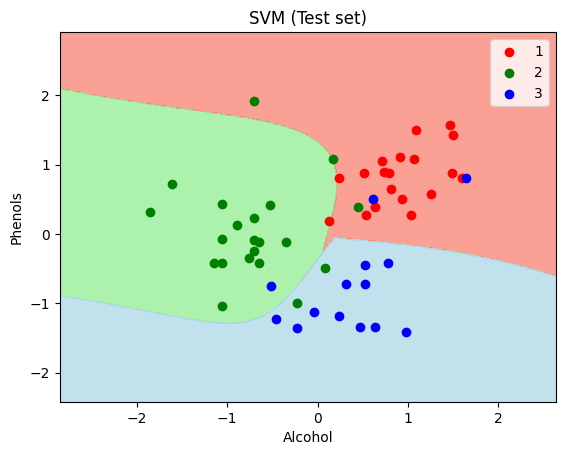

In [75]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(['salmon', 'lightgreen', 'lightblue'])
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green', 'blue'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.legend()
plt.show()

Jądra z najwyższym wskaźnikiem dokładności (accuracy) dla tego zestawu danych to promieniowe (rbf) i liniowe (linear) - uzyskały identyczny wynik wskaźnika. Wszystkie jądra osiągneły nadmierne dopasowanie modelu.